# 1. Introduction

## 1.1 Overview
### Problem statement:
  The problem of providing clean water to the population of over 57,000,000 in Tanzania is a major concern, as many existing water points in the country are in need of repair or have failed altogether. To address this issue, a classifier will be built to predict the condition of a water well based on information such as the type of pump, date of installation and others. The target audience for this classifier could be an NGO focused on repairing wells or the Government of Tanzania looking to improve the construction of new wells.

## 1.2 Business Understanding
The objective of building this classifier is to assist the NGO or the Government of Tanzania in their efforts to provide clean water to the population. By predicting the condition of a water well, the NGO can prioritize their resources and focus on the wells that are in need of repair, while the Government of Tanzania can use the insights to make informed decisions about the construction of new wells. The classifier will provide a reliable and efficient solution to the problem of ensuring clean water in Tanzania, which is essential for the health and well-being of its population.

## 1.3 Data Understanding 
The data used in this analysis was obtained from <a href="https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/">DrivenData</a> and was sourced from <a href="https://taarifa.org/">Taarifa</a> and the  <a href="https://www.maji.go.tz/">Tanzanian Ministry of Water</a> . It contains information on water wells in Tanzania and is divided into three files, including training set values, training set labels, and test set values. The training data has 59,400 observations and 41 variables, providing extensive information on various aspects of the water pumps:

- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- num_private -
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint

### Pump Conditions
- Functional
- Non- functional
- Repairs

# 2. Reading the Data

In [179]:
from yellowbrick.classifier import ROCAUC, ClassificationReport, ClassPredictionError
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.target import ClassBalance

ModuleNotFoundError: No module named 'yellowbrick'

In [178]:
 # Loading the required libraries    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score,\
    classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as Pipe

from xgboost import XGBClassifier

In [60]:
# Loading the datasets 
data = pd.read_csv('Data/Training_set_values.csv')
data_labels = pd.read_csv('Data/Training_set_labels.csv')

# 3.Checking the Dataset

In [61]:
# Determining the number of records in our datasets 

print('Shape of data:', data.shape)
print('Shape of data_labels:', data_labels.shape)

Shape of data: (59400, 40)
Shape of data_labels: (59400, 2)


 As we determined the number of rows and columns in each of the datasets we see that **data** has 59400 rows and 40 columns and **data_labels** has 54900 rows and 2 columns

In [62]:
# Previewing the top 5 of the data dataset
data.head()


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [63]:
# Previewing the top 5 of the data_labels dataset 
data_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [64]:
# merge the data to form one dataframe

df = data.join(data_labels.set_index('id'), on='id')
pd.set_option('display.max_columns', None)

In [65]:
# previewing the merged dataframe
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [66]:
# previewng the shape of new data frame
df.shape

(59400, 41)

As we created a new dataframe by merging the datasets we see that it has **59400 rows** and **41 columns**

In [67]:
# Checking the statistics of the numerical columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


In [68]:
# checking whether each column has an appropriate data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

We can note in this dataset we can detect that we have **missing values** in which we will do data cleaning 

In [69]:
# checking for column names
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [70]:
# checking for duplicated columns
df.duplicated().any()

False

# 4. Data Cleaning

- Before we move forward with building a classifier, it's important to understand the distributions and properties of the features in our dataset. This can help us identify any potential issues such as fillers, outliers, or incorrect values that may impact the performance of our model.

- One important step is to inspect the value types of our columns and make sure that they are in the correct format. For example, if a column is meant to represent a date, we want to make sure that it's stored as a date type and not as a string or integer. This will allow us to perform meaningful operations on the data and extract information such as the difference between two dates.

- Another important step is to check for the presence of any fillers or placeholder values in our columns. For instance, it's common to see the value 0 used as a filler when the actual value is unknown or missing. These fillers can negatively impact the performance of our model and should be handled appropriately. We could either remove them, impute them with a more appropriate value, or treat them as a separate category.

- In addition to this, it's also a good idea to inspect the range of values for each column and check for any outliers that might be present. Outliers can have a significant impact on the performance of some models, so it's important to detect and handle them appropriately. This could involve removing them, transforming the data, or treating them as a separate category.

- To summarize, inspecting the value types, ranges, and distributions of our columns is an important step in preparing our data for modeling. By understanding these properties, we can identify and handle any potential issues that may impact the performance of our classifier.

In [71]:
# checking for null values in the the dataset
 
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

- We can view in this data frame we have missing values that need to be cleaned

## 4.1 Uniformity


- The next step is to check the consistency of the data and make sure that the data types of each column are appropriate and correctly assigned. This examination will help to prevent any potential errors or inaccuracies in our analysis.

## 4.1.1 Management vs Scheme_management

In [72]:
# checking whether "scheme_management" and "management" columns seem to have similar entries

#Compare 'scheme_management' and 'management' column entries
df.scheme_management = df.scheme_management.str.lower() 
print('Both entries are the same: ', df.loc[df.scheme_management == df.management].shape[0])
print('Both entries differ total: ', df.loc[df.scheme_management != df.management].shape[0])
print('Both entries differ (Only non-null): ', df.loc[(df.scheme_management != df.management) &
                                              (df.scheme_management.isna() == False)].shape[0])
print('Difference because of null value: ', df.scheme_management.isna().sum())

Both entries are the same:  49336
Both entries differ total:  10064
Both entries differ (Only non-null):  6187
Difference because of null value:  3877


In [73]:
print('Management: \n', df.management.value_counts(), '\n\n')
print('scheme_management: \n', df.scheme_management.value_counts())

Management: 
 vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64 


scheme_management: 
 vwc                 36793
wug                  5206
water authority      3153
wua                  2883
water board          2748
parastatal           1680
private operator     1063
company              1061
other                 766
swc                    97
trust                  72
none                    1
Name: scheme_management, dtype: int64


We can see that the "Management"  and the "Scheme Management" columns are **similar**

In [74]:
# replacing the null values in scheme management with the equivalent in management
indexmodlist = list(df.loc[df.scheme_management.isna() == True].index) 
for index in indexmodlist:
    df.loc[index, 'scheme_management'] = df.loc[index, 'management'] 
    
print(df.scheme_management.isna().sum())
df.head()    

0


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,vwc,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,vwc,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,vwc,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,other,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## 4.1.2 Source vs Source_type

In [75]:
# Checking for unique values
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [76]:
# Checking for unique values
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

The borehole listings in the **source** have been separated into two categories based on the type of motor system used: machine dbh and hand dtw. Additionally, water pumps have been separated based on their source (lakes/rivers vs other/unknown sources). As these divisions are similar, the category **source_type** can be maintained.

In [77]:
# checking for unique values
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

It's important to note that the **source_class** column in the source divides water sources based on the origin of the water. This column will be kept.

## 4.1.3 Waterpoint_type vs Waterpoint_type_group

In [78]:
# checking for unique values
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [79]:
# checking for unique values
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

It's worth mentioning that the **waterpoint_type** and **waterpoint_type_group** columns in the source are similar, with the exception of an additional category in "waterpoint_type" called **Communal Standpipe Multiple**. Since this category is a variation of the "Communal Standpipe" category, the "waterpoint_type_group" column can be removed.

## 4.1.4 Quantity vs Quantity_group

In [80]:
# Check for unique values
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [81]:
# check for unique values
df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

These columns have the same records, so one can be dropped. **quantity_group** can be dropped

## 4.1.5 Payment vs Payment_type

In [82]:
# Check for unique values
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [83]:
# Check for unique values
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

This columns have the same entries, so one can be dropped. **payment_type** can be dropped.

## 4.1.6 Extraction_type vs Extraction_type_group vs Extraction_type_class

In [84]:
# Check for unique values
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [85]:
# Check for unique values
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [86]:
# Check for unique values
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

The source has three columns, **extraction_type**, **extraction_type_group**, and **extraction_type_class**, with similar entries. To simplify the data, two of these columns can be dropped. As **extraction_type_class** has better generalized the different types among the three columns, it will be kept.

In [87]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,vwc,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,vwc,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,vwc,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,other,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## 4.2 Column drops, date conversion and Filling missing values

In [88]:
# Drop the irrelevant columns
df = df.drop(['funder', 'subvillage', 'scheme_management', 'scheme_name'], axis=1)


In [89]:
# Drop the redundant columns that are unnecessary
drop_cols = ['quantity_group', 'quality_group', 'source_type', 'waterpoint_type_group', 'payment', \
             'extraction_type', 'extraction_type_group', 'recorded_by', 'region', 'amount_tsh', \
             'wpt_name', 'lga', 'ward', 'num_private', 'management_group', 'id']

df = df.drop(drop_cols, axis=1)

In [90]:
# Fill the null values with mean or filler value
df = df.fillna(value={'permit': False, 'public_meeting': True, 'installer': 'N/A'})

In [91]:
df.head()

,date_recorded,gps_height,installer,longitude,latitude,basin,region_code,district_code,population,public_meeting,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quantity,source,source_class,waterpoint_type,status_group
0,2011-03-14,1390,Roman,34.938093,-9.856322,Lake Nyasa,11,5,109,True,False,1999,gravity,vwc,annually,soft,enough,spring,groundwater,communal standpipe,functional
1,2013-03-06,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,20,2,280,True,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,2013-02-25,686,World vision,37.460664,-3.821329,Pangani,21,4,250,True,True,2009,gravity,vwc,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional
3,2013-01-28,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,58,True,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,non functional
4,2011-07-13,0,Artisan,31.130847,-1.825359,Lake Victoria,18,1,0,True,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional


In [92]:
# # convert all 0 to NaN and then convert other years into 'ages' and then fill NaN in with average age
df.construction_year = df.construction_year.replace(0, np.NaN)

df['age'] = 2013 - df.construction_year
df.age.fillna(df.age.mean(), inplace=True)
df.age = df.age.round().astype(int)

df.drop('construction_year', axis=1, inplace=True)

In [93]:
df.head()

,date_recorded,gps_height,installer,longitude,latitude,basin,region_code,district_code,population,public_meeting,permit,extraction_type_class,management,payment_type,water_quality,quantity,source,source_class,waterpoint_type,status_group,age
0,2011-03-14,1390,Roman,34.938093,-9.856322,Lake Nyasa,11,5,109,True,False,gravity,vwc,annually,soft,enough,spring,groundwater,communal standpipe,functional,14
1,2013-03-06,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,20,2,280,True,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional,3
2,2013-02-25,686,World vision,37.460664,-3.821329,Pangani,21,4,250,True,True,gravity,vwc,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional,4
3,2013-01-28,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,58,True,True,submersible,vwc,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,non functional,27
4,2011-07-13,0,Artisan,31.130847,-1.825359,Lake Victoria,18,1,0,True,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional,16


In [94]:
# assign any gps_height values of 0 to the height mean
gps_mean = df[df['gps_height'] > 0]['gps_height'].mean()
df['gps_height'] = np.where(df['gps_height'] == 0, gps_mean, df['gps_height'])

In [95]:
# assign any population values of 0 to the population mean
pop_mean = df[df['population'] > 0]['population'].mean()
df['population'] = np.where(df['population'] == 0, pop_mean, df['population'])

In [96]:
# change permit and permit meeting from booleans into int
df['public_meeting'] = df['public_meeting'].astype(int)
df['permit'] = df['permit'].astype(int)

In [97]:
# convert to string region_code and district_code
df['region_code'] = df['region_code'].astype(str)
df['district_code'] = df['district_code'].astype(str)

In [98]:
# convert int32 to int64 
df['public_meeting'] = df['public_meeting'].astype('int64')
df['permit'] = df['permit'].astype('int64')
df['age'] = df['age'].astype('int64')

In [99]:
#Convert date into date time and then take only year to signify age of pump record
df['date_recorded'] = pd.to_datetime(df['date_recorded'])

In [100]:
# dropping the age_record column due to irrelevance
df['age_record'] = 2013 - df['date_recorded'].dt.year
df = df.drop('date_recorded', axis=1)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             59400 non-null  float64
 1   installer              59400 non-null  object 
 2   longitude              59400 non-null  float64
 3   latitude               59400 non-null  float64
 4   basin                  59400 non-null  object 
 5   region_code            59400 non-null  object 
 6   district_code          59400 non-null  object 
 7   population             59400 non-null  float64
 8   public_meeting         59400 non-null  int64  
 9   permit                 59400 non-null  int64  
 10  extraction_type_class  59400 non-null  object 
 11  management             59400 non-null  object 
 12  payment_type           59400 non-null  object 
 13  water_quality          59400 non-null  object 
 14  quantity               59400 non-null  object 
 15  so

# 5. Exploratory Data Analysis(EDA)

## 5.1 Does the quality of water play a role in the functionality of a well?

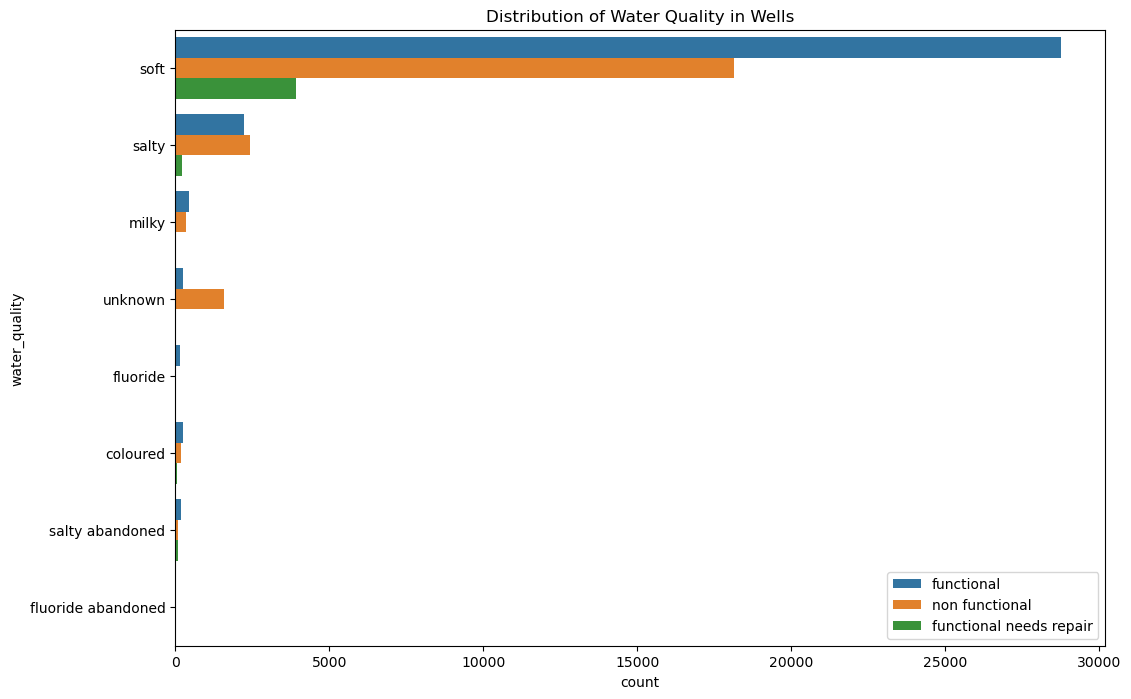

In [102]:
# Plotting the distribution of water quality in the wells
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(data=df, y='water_quality', hue='status_group', orient='h')

ax.set_title('Distribution of Water Quality in Wells')
ax.legend(loc='lower right')

#plt.savefig(Images/'Water_Quality_Distribution')

- It can be observed that a majority of wells have soft water and are functional, however, there is a significant number of non-functional wells and wells in need of repair that also possess soft water. Furthermore, wells with salty or unknown water quality tend to have higher instances of non-functionality compared to functional wells.

## 5.2 Does the type of water source have an impact on the functioning of wells?

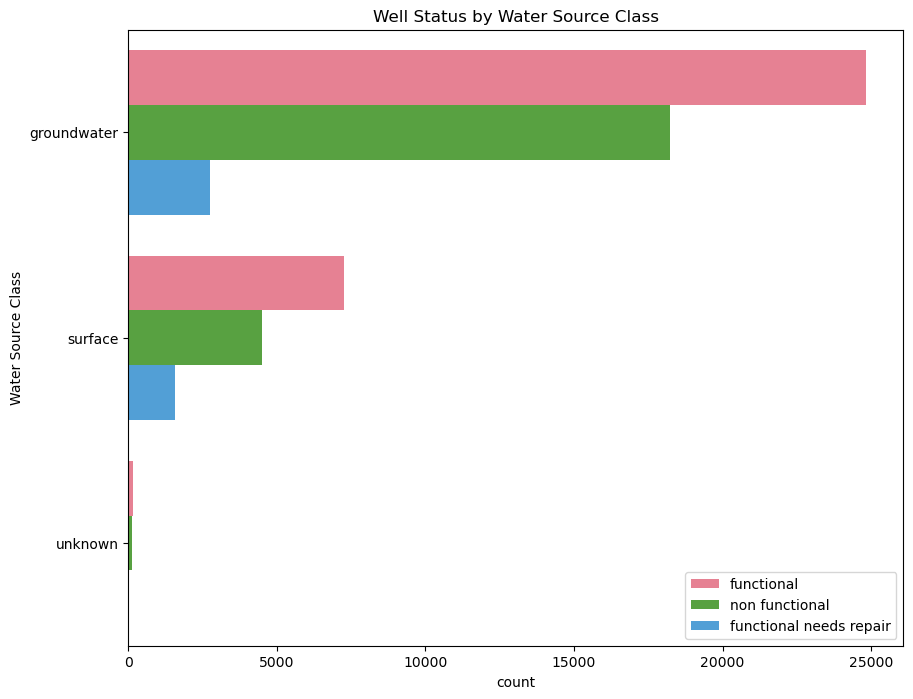

In [103]:
# plotting water sources vs well functionality

fig, ax = plt.subplots(figsize = (10,8))

sns.countplot(data = df, y = 'source_class', hue = 'status_group', palette='husl')

ax.set_title('Well Status by Water Source Class')
ax.set_ylabel('Water Source Class')
ax.legend(loc = 'lower right')

#plt.savefig('Images/Well Status by Water Source');

- It can be observed that the majority of water pumps are from a groundwater source, with a relatively low number of sources classified as unknown.

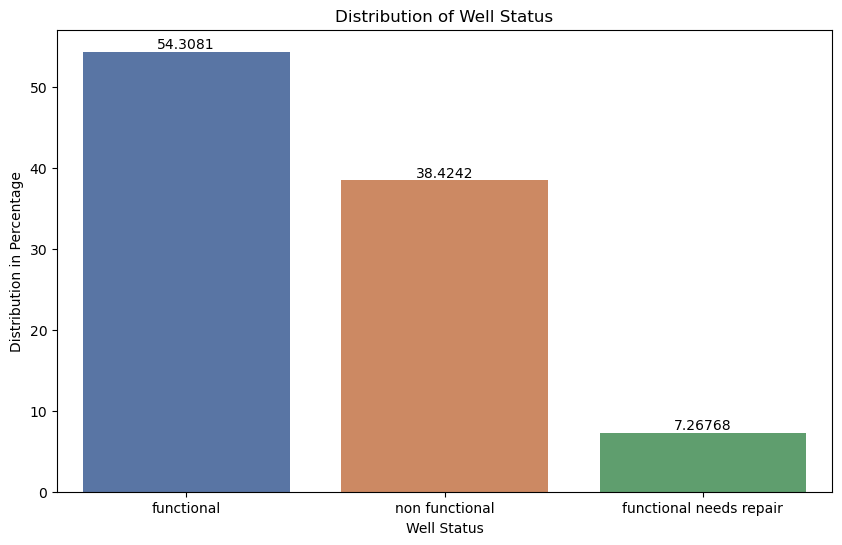

In [104]:
# creating a dataframe of the distribution of the status of the wells

status = pd.DataFrame(df['status_group'].value_counts(normalize = True)*100)
status

fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(x = status.index, y = status['status_group'], palette='deep')

ax.set_title('Distribution of Well Status')
ax.set_xlabel('Well Status')
ax.set_ylabel('Distribution in Percentage')

for i in ax.containers:
    ax.bar_label(i)

#plt.savefig('Images/Distribution of well status');

## 5.3 Is there a relationship between the location of water points and their functional status?

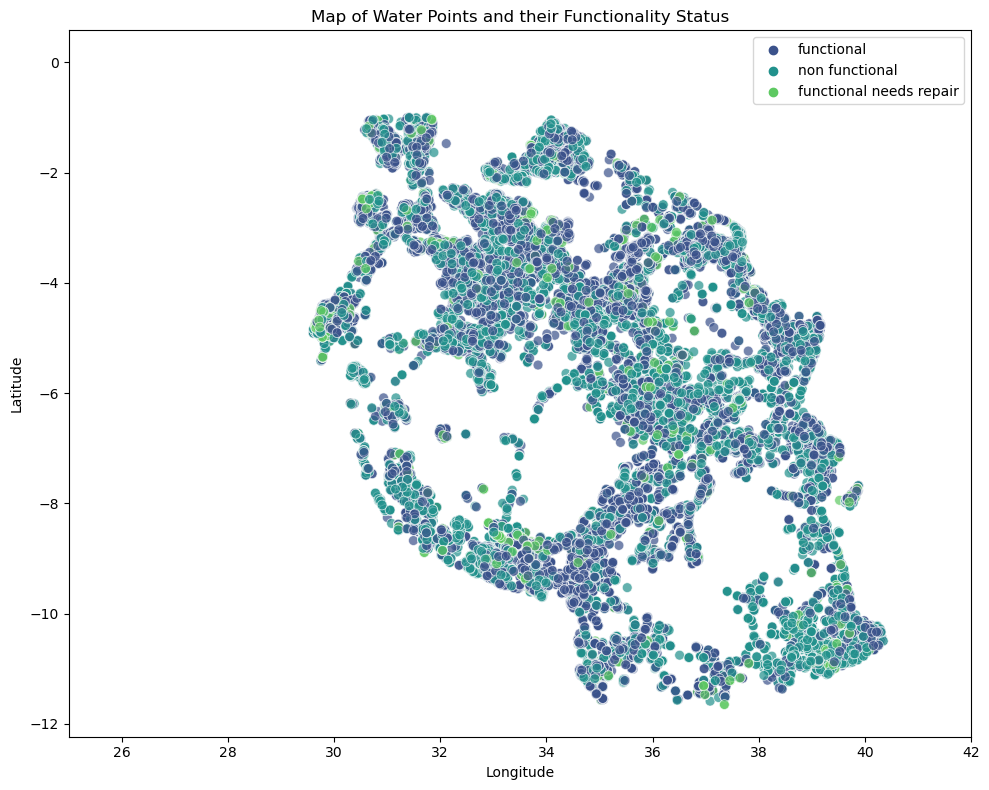

In [105]:
fig, ax = plt.subplots(figsize = (10,8))

sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'status_group', s = 50, alpha = 0.7, palette = 'viridis')

ax.set_xlim(25, 42)

ax.set_title('Map of Water Points and their Functionality Status')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend(loc = 'upper right')

plt.tight_layout()

#plt.savefig('Images/Map of water points vs status');

- It can be observed that there is a concentration of non-functional water sources in the southeast, middle, and southwest areas. However, there are also large areas without any water sources.

## 5.4 Does the method of water extraction impact the functionality of wells?

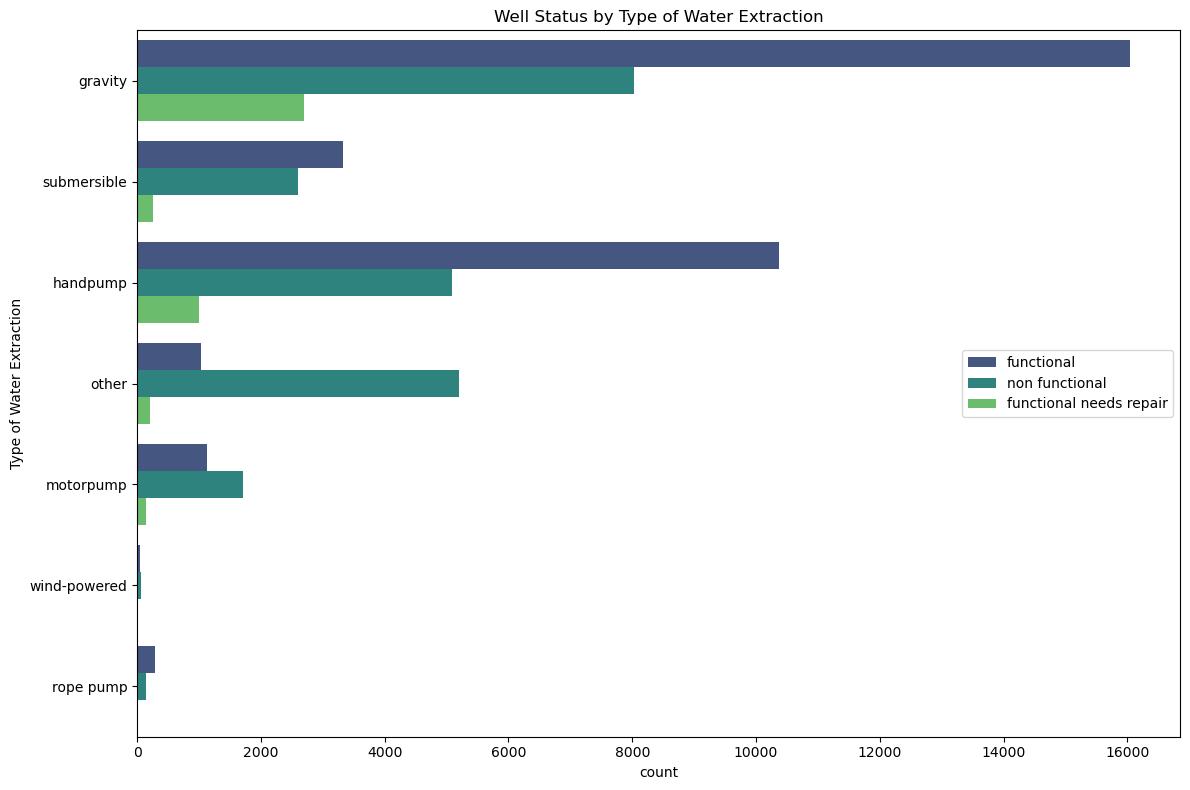

In [106]:
fig, ax = plt.subplots(figsize = (12,8))

sns.countplot(data = df, y= 'extraction_type_class', hue = 'status_group', palette = 'viridis')

ax.set_title('Well Status by Type of Water Extraction')
ax.set_ylabel('Type of Water Extraction')
ax.legend(loc = 'center right')

plt.tight_layout()

#plt.savefig('Images/Well Status by Extraction Type');

- It is evident from the plot that the most common method of water extraction is through gravity, followed by hand pump. While these methods have a considerable number of functional wells, they also have a significant proportion of non-functional wells. Notably, other means of water extraction, such as rope pump and motor pump, have a higher proportion of non-functional wells compared to functional ones. In particular, the number of non-functional wells using these methods is nearly three times that of functional wells. Furthermore, the motor pump method has a higher number of non-functional wells than functional ones.

# 6 Predictive Modelling

In [107]:
df.describe()

,gps_height,longitude,latitude,population,public_meeting,permit,age,age_record
count,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,1033.133363,34.077427,-5.706033e+00,281.087167,0.914899,0.654074,16.120707,1.078333
std,496.501747,6.567432,2.946019e+00,451.765813,0.279034,0.475673,10.066168,0.958758
min,-90.000000,0.000000,-1.164944e+01,1.000000,0.000000,0.000000,0.000000,0.000000
25%,903.000000,33.090347,-8.540621e+00,100.000000,1.000000,0.000000,9.000000,0.000000
50%,1060.341803,34.908743,-5.021597e+00,281.087167,1.000000,1.000000,16.000000,1.000000
75%,1319.250000,37.178387,-3.326156e+00,281.087167,1.000000,1.000000,17.000000,2.000000
max,2770.000000,40.345193,-2.000000e-08,30500.000000,1.000000,1.000000,53.000000,11.000000


In [108]:
#convert status_group to functional=2, repairs = 1, and non functional = 0
status = {'functional': 2, 'functional needs repair': 1, 'non functional': 0}

df['target'] = df['status_group'].map(status)
df = df.drop('status_group', axis=1)

## 6.1 Correlation

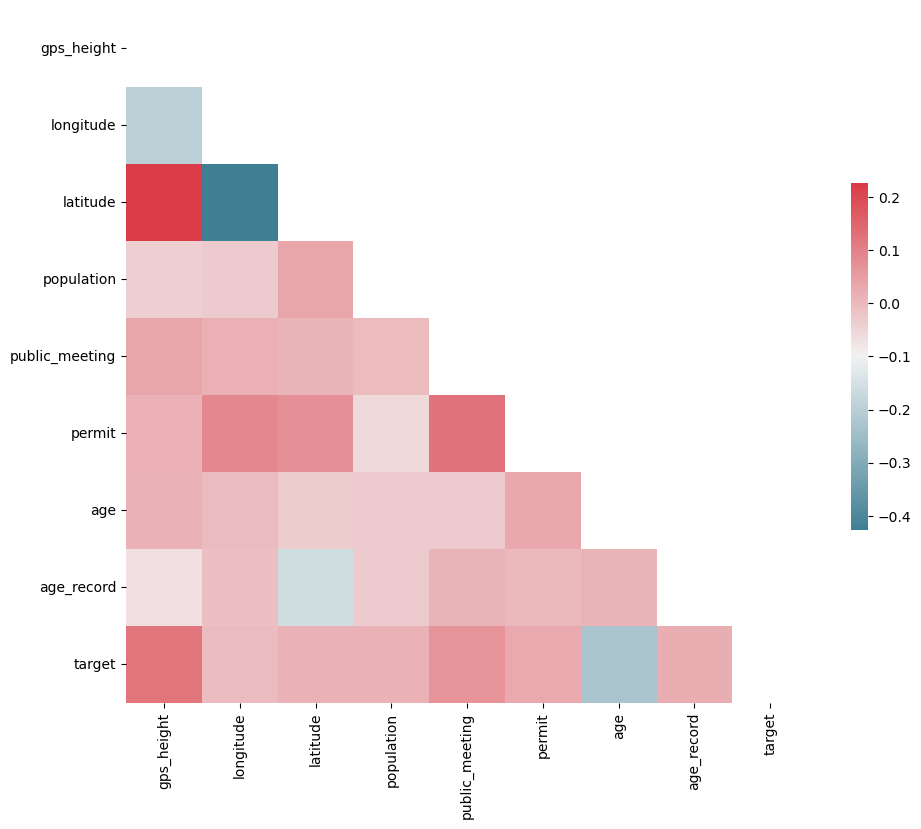

In [109]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, cbar_kws={"shrink": .5});

- The correlation matrix provides a visual representation of the relationship between each feature and the target value before we proceed with implementing any classification models. This helps us understand the degree of association between the features and the target, allowing us to make informed decisions regarding which features to include in our models.

## 6.2 One Hot Encoding

### 6.2.1 Train Test Split

## Train

In [128]:
X = df.drop(['target'], axis=1)
y = df.target

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [141]:
X_train_cat = X_train.select_dtypes('object')

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

dummy = ohe.fit_transform(X_train_cat)

cat_columns = X_train_cat.columns
cat_categories = [ohe.categories_[i] for i,col in enumerate(X_train_cat.columns)]

columns = []
for i,col in enumerate(cat_columns):
    for cat in cat_categories[i]:
            columns.append(col + "_" + cat)

dummy_df = pd.DataFrame(dummy, columns=columns, index=X_train_cat.index)

In [142]:
X_train_nums = X_train.select_dtypes(include=['float64', 'int64'])

ss = StandardScaler()
scaled = ss.fit_transform(X_train_nums)


scaled_df = pd.DataFrame(scaled, index=X_train_nums.index)
scaled_df.columns = X_train_nums.columns

In [143]:
X_train_clean = pd.concat([scaled_df, dummy_df], axis=1)
X_train_clean

gps_height  longitude  latitude  population  public_meeting    permit  \
43069    1.635537   0.105481 -1.162696   -0.546617        0.307594  0.728339   
58858    0.059212  -0.549544  0.996545    0.005512        0.307594 -1.372988   
41707    1.623499   0.177969  0.849083   -0.336137        0.307594  0.728339   
30674    0.343432   0.668131  0.272582   -0.649519        0.307594  0.728339   
20944   -1.947848   0.794903 -0.448784    1.782697        0.307594 -1.372988   
...           ...        ...       ...         ...             ...       ...   
54343   -1.412146   0.346536 -1.041913   -0.055497        0.307594  0.728339   
38158    1.428880   0.064069 -1.380354   -0.570004        0.307594 -1.372988   
860     -2.094314   0.747756  0.099081    1.686812       -3.251043 -1.372988   
15795    0.059212   0.030994  0.886178    0.005512        0.307594  0.728339   
56422    0.519993   0.540319  0.850697   -0.649519        0.307594  0.728339   

            age  age_record  installer_-  installer_0  installer_A.D.B  \
43069 -1.202387    0.963380          0.0          0.0              0.0   
58858 -0.011677    0.963380          0.0          0.0              0.0   
41707 -0.805483   -1.125659          0.0          0.0              0.0   
30674  2.171292    0.963380          0.0          0.0              0.0   
20944 -1.301613    0.963380          0.0          0.0              0.0   
...         ...         ...          ...          ...              ...   
54343  0.186775    0.963380          0.0          0.0              0.0   
38158  0.881356    0.963380          0.0          0.0              0.0   
860   -0.805483    0.963380          0.0          0.0              0.0   
15795 -0.011677   -0.081140          0.0          0.0              0.0   
56422  2.072066   -1.125659          0.0          0.0              0.0   

       installer_AAR  installer_ABASIA  installer_AC  installer_ACORD  \
43069            0.0               0.0           0.0              0.0   
58858            0.0               0.0           0.0              0.0   
41707            0.0               0.0           0.0              0.0   
30674            0.0               0.0           0.0              0.0   
20944            0.0               0.0           0.0              0.0   
...              ...               ...           ...              ...   
54343            0.0               0.0           0.0              0.0   
38158            0.0               0.0           0.0              0.0   
860              0.0               0.0           0.0              0.0   
15795            0.0               0.0           0.0              0.0   
56422            0.0               0.0           0.0              0.0   

       installer_ACRA  installer_ACTIVE TANK CO  installer_ACTIVE TANK CO LTD  \
43069             1.0                       0.0                           0.0   
58858             0.0                       0.0                           0.0   
41707             0.0                       0.0                           0.0   
30674             0.0                       0.0                           0.0   
20944             0.0                       0.0                           0.0   
...               ...                       ...                           ...   
54343             0.0                       0.0                           0.0   
38158             0.0                       0.0                           0.0   
860               0.0                       0.0                           0.0   
15795             0.0                       0.0                           0.0   
56422             0.0                       0.0                           0.0   

       installer_AD  installer_ADAP  installer_ADB  installer_ADP  \
43069           0.0             0.0            0.0            0.0   
58858           0.0             0.0            0.0            0.0   
41707           0.0             0.0            0.0            0.0   
30674           0.0            

## Test

In [144]:
X_test_cat = X_test.select_dtypes('object')

dummy = ohe.transform(X_test_cat)

cat_columns = X_test_cat.columns
cat_categories = [ohe.categories_[i] for i,col in enumerate(X_test_cat.columns)]

columns = []
for i,col in enumerate(cat_columns):
    for cat in cat_categories[i]:
        columns.append(col + "_" + cat)

dummy_df = pd.DataFrame(dummy, columns=columns, index=X_test_cat.index)

In [145]:
X_test_nums = X_test.select_dtypes(include=['float64', 'int64'])

scaled = ss.transform(X_test_nums)

scaled_df = pd.DataFrame(scaled, index=X_test_nums.index)
scaled_df.columns = X_test_nums.columns

In [146]:
X_test_clean = pd.concat([scaled_df, dummy_df], axis=1)
X_test_clean

gps_height  longitude  latitude  population  public_meeting    permit  \
2980     0.059212  -0.327697  0.719755    0.005512        0.307594  0.728339   
5246     0.059212  -0.197334  0.260975    0.005512        0.307594  0.728339   
22659    1.292447   0.211300  0.500095   -0.305734        0.307594  0.728339   
39888    0.059212  -0.149936 -1.138742    0.005512       -3.251043 -1.372988   
13361    0.156839   0.015681  0.435974   -0.102270        0.307594  0.728339   
...           ...        ...       ...         ...             ...       ...   
13160    1.304485   0.270061  0.836932   -0.184124        0.307594  0.728339   
3852     0.059212  -0.134868  0.319328    0.005512       -3.251043 -1.372988   
28598    2.012735   0.089798 -1.335730   -0.581697        0.307594  0.728339   
43736    0.546075  -0.626893  0.338635    0.868277        0.307594  0.728339   
41923    0.059212  -0.108594  0.943665    0.005512        0.307594  0.728339   

            age  age_record  installer_-  installer_0  installer_A.D.B  \
2980  -0.011677   -0.081140          0.0          0.0              0.0   
5246  -0.011677   -0.081140          0.0          0.0              0.0   
22659 -1.103161   -1.125659          0.0          0.0              0.0   
39888 -0.011677    0.963380          0.0          0.0              0.0   
13361 -1.400839   -1.125659          0.0          0.0              0.0   
...         ...         ...          ...          ...              ...   
13160 -1.202387   -1.125659          0.0          0.0              0.0   
3852  -0.011677   -1.125659          0.0          0.0              0.0   
28598 -1.003935    0.963380          0.0          0.0              0.0   
43736 -0.706258   -1.125659          0.0          0.0              0.0   
41923 -0.011677    0.963380          0.0          0.0              0.0   

       installer_AAR  installer_ABASIA  installer_AC  installer_ACORD  \
2980             0.0               0.0           0.0              0.0   
5246             0.0               0.0           0.0              0.0   
22659            0.0               0.0           0.0              0.0   
39888            0.0               0.0           0.0              0.0   
13361            0.0               0.0           0.0              0.0   
...              ...               ...           ...              ...   
13160            0.0               0.0           0.0              0.0   
3852             0.0               0.0           0.0              0.0   
28598            0.0               0.0           0.0              0.0   
43736            0.0               0.0           0.0              0.0   
41923            0.0               0.0           0.0              0.0   

       installer_ACRA  installer_ACTIVE TANK CO  installer_ACTIVE TANK CO LTD  \
2980              0.0                       0.0                           0.0   
5246              0.0                       0.0                           0.0   
22659             0.0                       0.0                           0.0   
39888             0.0                       0.0                           0.0   
13361             0.0                       0.0                           0.0   
...               ...                       ...                           ...   
13160             0.0                       0.0                           0.0   
3852              0.0                       0.0                           0.0   
28598             0.0                       0.0                           0.0   
43736             0.0                       0.0                           0.0   
41923             0.0                       0.0                           0.0   

       installer_AD  installer_ADAP  installer_ADB  installer_ADP  \
2980            0.0             0.0            0.0            0.0   
5246            0.0             0.0            0.0            0.0   
22659           0.0             0.0            0.0            0.0   
39888           0.0            

In [148]:
# The code below replaces square brackets, angle brackets
# and square brackets in the column names of X_train_clean and X_test_clean with underscores using the re library
import re
regex = re.compile(r"[\[\]<]")
X_train_clean.rename(columns=lambda x: re.sub(regex, "_", x), inplace=True)
X_test_clean.rename(columns=lambda x: re.sub(regex, "_", x), inplace=True)

# 7.Modelling

## 7.1 Logistic Regression

In [149]:
y_train.value_counts(normalize=True)

2    0.541967
0    0.385305
1    0.072727
Name: target, dtype: float64

In [150]:
logreg = LogisticRegression(max_iter=10000, random_state=42)

logreg.fit(X_train_clean, y_train)
logreg.score(X_train_clean, y_train), logreg.score(X_test_clean, y_test)

(0.7686147186147186, 0.7615039281705949)

- The Logistic Regression has given **76% accuracy**

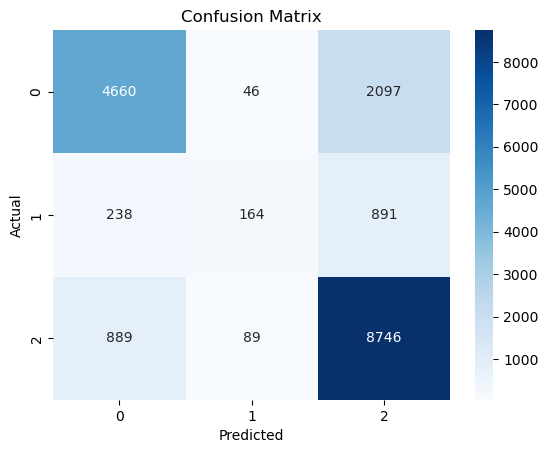

In [151]:
y_pred = logreg.predict(X_test_clean)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- Our closer examination of the model's performance shows that it did an excellent job in predicting the "functional" class (class 2), but its performance was average in predicting the "repair" class (class 0), and significantly poor in predicting the "non-functional" class (class 1). Given the importance of avoiding false positives in this scenario, it is evident that the model needs improvement. Let's take a closer look at some alternative models to see if they can provide better results.

# 7.2 Random Forest

In [152]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_clean, y_train)

rfc.score(X_train_clean, y_train), rfc.score(X_test_clean, y_test)

(0.9957431457431457, 0.7990460157126824)

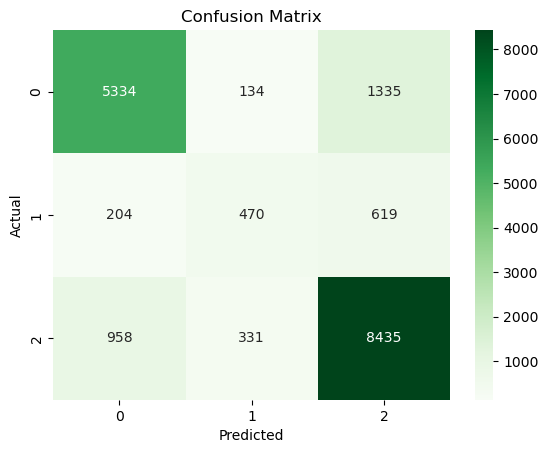

In [153]:
y_pred = rfc.predict(X_test_clean)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- By examining the results of the decision tree model, it is evident that there has been a significant improvement in both the score and the confusion matrix. To further optimize the performance of the model, it is necessary to fine-tune its hyperparameters. In this context, Grid Search can be employed to determine the best set of hyperparameters that yield the highest accuracy. This process involves systematically testing different combinations of hyperparameters and evaluating their performance using cross-validation. Once the best hyperparameters have been identified, the model can be retrained using these parameters to achieve its highest potential performance.

In [154]:
rfc_params = {'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [1, 5, 10],
              'n_estimators': [100, 500, 1000],
              'max_depth': [5, 15, 30]}
              

In [155]:
# best_parameters = rfc_gs.best_params_
print({'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 1,
 'n_estimators': 1000})

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 1000}


Our grid search has provided us with optimal hyperparameters. Let's re-fit our model using these parameters

In [156]:
rfc_best = RandomForestClassifier(criterion='entropy', max_depth=30, \
                                  min_samples_leaf=1, n_estimators=100, random_state=42)

rfc_best.fit(X_train_clean, y_train)
rfc_best.score(X_train_clean, y_train), rfc_best.score(X_test_clean, y_test)

(0.946007696007696, 0.8062850729517396)

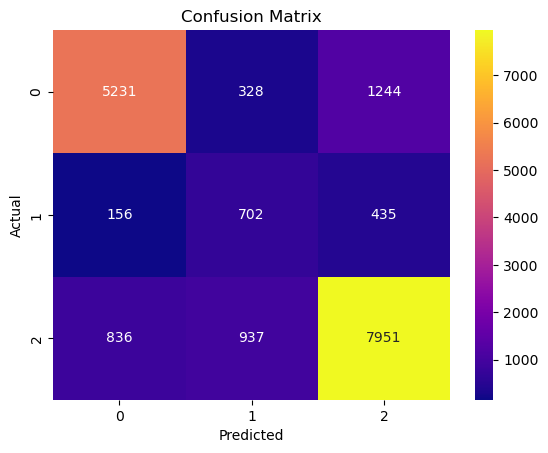

In [168]:
y_pred = rfc_best.predict(X_test_clean)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='plasma', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- It is evident that there is an imbalance in the distribution of the classes, particularly in class 1: "Functional Needs Repair". To address this issue and potentially reduce false positives, we will employ the Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset.

## 7.2 SMOTE

In [158]:
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train_clean, y_train)
y_smote.value_counts()

0    22535
2    22535
1    22535
Name: target, dtype: int64

In [159]:
rfc_best.fit(X_smote, y_smote)
rfc_best.score(X_smote, y_smote), rfc_best.score(X_test_clean, y_test)

(0.9619998520819466, 0.7791245791245791)

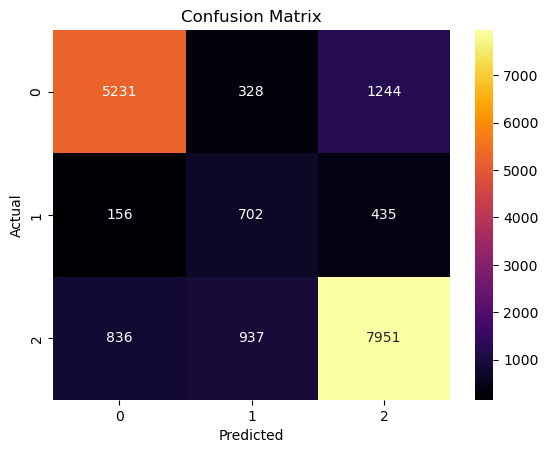

In [169]:
y_pred = rfc_best.predict(X_test_clean)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='inferno', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- **We observe that the score of our model has decreased, but when we take a closer look at the confusion matrix, we see that the accuracy of our predictions of Non-Functional and Repairs pumps has actually improved. This suggests that, despite the decrease in overall score, our model has become more accurate in its predictions for those specific classes. Thus, we can conclude that this model is indeed an improvement over the previous models that we have tried.**

## 7.3 XGBoost

In [161]:
clf = XGBClassifier()

clf.fit(X_train_clean, y_train)
clf.score(X_train_clean, y_train), clf.score(X_test_clean, y_test)

(0.8151515151515152, 0.7887205387205387)

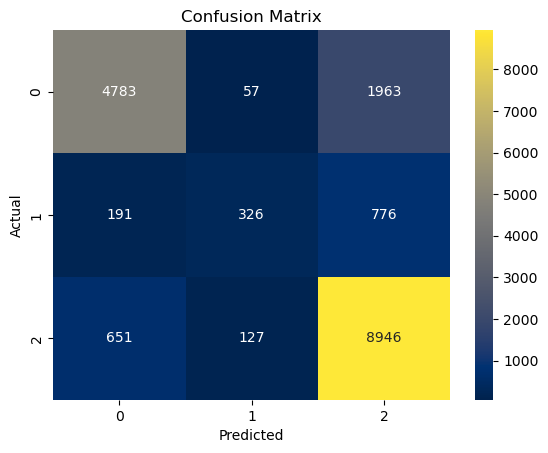

In [170]:
y_pred = clf.predict(X_test_clean)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='cividis', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- **After a preliminary analysis, it appears that the decision tree model is not performing as well as the Random Forest model. However, this could be because we have not yet attempted to adjust the parameters through hyperparameter tuning or balanced the data through the use of SMOTE. Thus, it would be worthwhile to explore these avenues to see if we can improve the performance of the decision tree model. By doing so, we may be able to determine if the decision tree model has the potential to surpass the performance of the Random Forest model or if it will continue to lag behind in its predictions.**

In [171]:
clf_params = {'max_depth': [5, 10, 15],
    'n_estimators': [100, 150],
    'learning_rate': [0.2, 0.3]}

In [173]:
# best_parameters = clf_gs.best_params_
# best_parameters
print({'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 100})

{'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 100}


In [174]:
clf_best = XGBClassifier(learning_rate=0.2, max_depth=15, n_estimators=100)

clf_best.fit(X_smote, y_smote)
clf_best.score(X_smote, y_smote), clf_best.score(X_test_clean, y_test)

(0.9433030101323867, 0.7877665544332211)

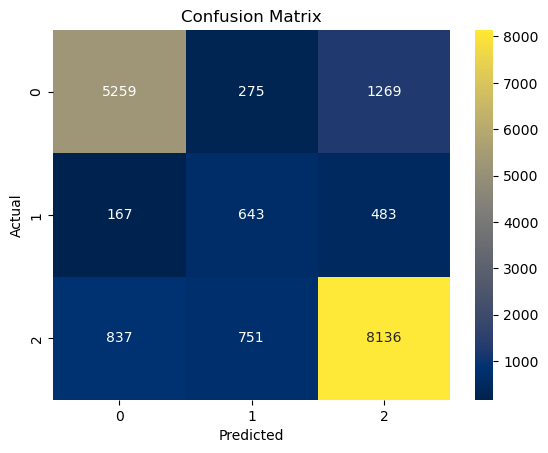

In [175]:
y_pred = clf_best.predict(X_test_clean)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='cividis', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**This model does a better job at predicting Non Functional and Functional, but has more False Functional predictions than the Random Forest.**

## 7.4 Best Fit For Business Requirements

In [180]:
def evaluate_model(model):
    model_pipe = Pipe(steps=[('smote', SMOTE(random_state=42)),
                             ('model', model)])
        
    model_pipe.fit(X_train_clean, y_train)
    y_pred = model.predict(X_test_clean)
    
    print(f"Model: {model} ")
    print("--------------------")
    print(f"Model Score: {round(model_pipe.score(X_test_clean, y_test),2)}")
    print(f"ROC AUC Score: {round(roc_auc_score(y_test, clf.predict_proba(X_test_clean), multi_class='ovr'), 2)}")
    
    print(f"Recall Score: {round(recall_score(y_test, y_pred, average='weighted'), 2)}")
    print(f"Precision Score: {round(precision_score(y_test, y_pred, average='weighted'), 2)}")
    print(f"F1 Score: {round(f1_score(y_test, y_pred, average='weighted'), 2)}")
    
    print(f"Classification Report: \n{classification_report(y_test, y_pred, digits=2)}")
    return model_pipe

models = [LogisticRegression(max_iter=10000, random_state=42),
          RandomForestClassifier(criterion='entropy', max_depth=30,min_samples_leaf=1, n_estimators=100, random_state=42), 
          XGBClassifier(learning_rate=0.2, max_depth=15, n_estimators=100)]
    
for model in models:
    evaluate_model(model)

Model: LogisticRegression(max_iter=10000, random_state=42) 
--------------------
Model Score: 0.65
ROC AUC Score: 0.89
Recall Score: 0.65
Precision Score: 0.76
F1 Score: 0.68
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.66      0.72      6803
           1       0.20      0.70      0.31      1293
           2       0.81      0.63      0.71      9724

    accuracy                           0.65     17820
   macro avg       0.60      0.66      0.58     17820
weighted avg       0.76      0.65      0.68     17820

Model: RandomForestClassifier(criterion='entropy', max_depth=30, random_state=42) 
--------------------
Model Score: 0.78
ROC AUC Score: 0.89
Recall Score: 0.78
Precision Score: 0.8
F1 Score: 0.79
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      6803
           1       0.36      0.54      0.43      1293
           2       0.83      0.82   

# 8 Evaluation

- After evaluating the results from the classification reports and different scores for each model, it appears that both XGBoost and Random Forest have quite comparable outcomes. The Random Forest Classifier does seem to perform slightly better in terms of predicting the 1 (Repair) class, however, when taking a holistic approach, XGBoost has just a slightly higher accuracy overall. Based on this analysis, it is fair to say that either one of these models could be considered as an acceptable solution for our business requirements. However, further investigation and fine-tuning of these models might be necessary in order to determine which one would be the best fit. Additionally, it might also be worth considering other algorithms or models to see if they could perform better than both XGBoost and Random Forest, given the unique characteristics of the data and the specific goals and requirements of the business.